In [90]:
# ==============================================================================
# PHASE 1: Data Acquisition & Setup
# ==============================================================================
print("--- Starting Phase 1: Data Acquisition & Setup ---")

# STEP 1.1: Project Setup and Directory Structure Creation
print("\n--- Step 1.1: Setting up project directory structure ---")

import os

# Define the base project directory
project_base_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print(f"Project Base Directory: {project_base_dir}")

# Directories to create
directories = ['data', 'models', 'notebooks', 'reports', 'visualizations', 'scripts']

def setup_project_dirs(base_dir, dirs):
    for dir_name in dirs:
        path = os.path.join(base_dir, dir_name)
        os.makedirs(path, exist_ok=True)
        print(f"Directory ensured: {path}")

setup_project_dirs(project_base_dir, directories)


--- Starting Phase 1: Data Acquisition & Setup ---

--- Step 1.1: Setting up project directory structure ---
Project Base Directory: c:\Users\SARAYU\OneDrive\Desktop\churn_prediction_projectdata
Directory ensured: c:\Users\SARAYU\OneDrive\Desktop\churn_prediction_projectdata\data
Directory ensured: c:\Users\SARAYU\OneDrive\Desktop\churn_prediction_projectdata\models
Directory ensured: c:\Users\SARAYU\OneDrive\Desktop\churn_prediction_projectdata\notebooks
Directory ensured: c:\Users\SARAYU\OneDrive\Desktop\churn_prediction_projectdata\reports
Directory ensured: c:\Users\SARAYU\OneDrive\Desktop\churn_prediction_projectdata\visualizations
Directory ensured: c:\Users\SARAYU\OneDrive\Desktop\churn_prediction_projectdata\scripts


In [91]:
# ==============================================================================
# STEP 1.2: Load Data
# ==============================================================================
print("\n--- Step 1.2: Loading Data ---")

import pandas as pd
import os

# File name (as per your folder: Telco_customer_churn.xlsx)
data_file_name = 'Telco_customer_churn.xlsx'

# Construct full path to data file
data_file_path = os.path.join(project_base_dir, 'data', data_file_name)

try:
    # Read the Excel file
    df = pd.read_excel(data_file_path)
    print(f"✅ Successfully loaded data from: {data_file_path}\n")
    
    # Display dataset details
    print("🔍 Dataset Preview:")
    print(df.head())
    
    print("\nℹ️ Dataset Info:")
    df.info()
    
    print("\n❗ Missing Values:")
    print(df.isnull().sum())

except FileNotFoundError:
    print(f"❌ Error: Data file not found at: {data_file_path}")
    print(f"🔎 Current working directory: {os.getcwd()}")
    expected_data_dir = os.path.join(project_base_dir, 'data')
    if os.path.isdir(expected_data_dir):
        print(f"📁 Files in '{expected_data_dir}': {os.listdir(expected_data_dir)}")
    else:
        print(f"⚠️ Expected data directory '{expected_data_dir}' does not exist or is not a directory.")

except Exception as e:
    print(f"🚫 An unexpected error occurred while loading data: {e}")



--- Step 1.2: Loading Data ---
✅ Successfully loaded data from: c:\Users\SARAYU\OneDrive\Desktop\churn_prediction_projectdata\data\Telco_customer_churn.xlsx

🔍 Dataset Preview:
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Fem

In [92]:
# ==============================================================================
# PHASE 2: Data Preprocessing
# ==============================================================================
print("\n--- Starting Phase 2: Data Preprocessing ---")

import pandas as pd
import numpy as np
import os

# -------------------------------------------------------------------
# STEP 2.0: Normalize column names (lowercase, underscores)
# -------------------------------------------------------------------
print("\n--- Step 2.0: Normalizing column names ---")
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
print("Normalized column names:")
print(df.columns.tolist())



--- Starting Phase 2: Data Preprocessing ---

--- Step 2.0: Normalizing column names ---
Normalized column names:
['customerid', 'count', 'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure_months', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn_label', 'churn_value', 'churn_score', 'cltv', 'churn_reason']


In [93]:
# -------------------------------------------------------------------
# STEP 2.1: Convert 'total_charges' to numeric and handle NaNs
# -------------------------------------------------------------------
print("\n--- Step 2.1: Converting 'total_charges' and handling NaNs ---")

if 'total_charges' in df.columns:
    df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
    df['total_charges'] = df['total_charges'].fillna(0)  # Safer than inplace
    print("'total_charges' converted to numeric and NaNs filled with 0.")
else:
    print("⚠️ 'total_charges' column not found. Skipping this step.")


--- Step 2.1: Converting 'total_charges' and handling NaNs ---
'total_charges' converted to numeric and NaNs filled with 0.


In [94]:
# -------------------------------------------------------------------
# STEP 2.2: Map binary categorical features to 1/0
# -------------------------------------------------------------------
print("\n--- Step 2.2: Mapping binary categorical features (Yes/No) to 1/0 ---")

binary_cols = [
    'partner', 'dependents', 'phone_service', 'paperless_billing',
    'multiple_lines', 'online_security', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
]
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')
        df[col] = df[col].map({'Yes': 1, 'No': 0})
        print(f"Mapped '{col}' to 1/0.")
    else:
        print(f"⚠️ Column '{col}' not found. Skipping.")



--- Step 2.2: Mapping binary categorical features (Yes/No) to 1/0 ---
Mapped 'partner' to 1/0.
Mapped 'dependents' to 1/0.
Mapped 'phone_service' to 1/0.
Mapped 'paperless_billing' to 1/0.
Mapped 'multiple_lines' to 1/0.
Mapped 'online_security' to 1/0.
Mapped 'online_backup' to 1/0.
Mapped 'device_protection' to 1/0.
Mapped 'tech_support' to 1/0.
Mapped 'streaming_tv' to 1/0.
Mapped 'streaming_movies' to 1/0.


In [95]:
# -------------------------------------------------------------------
# STEP 2.3: Handle 'senior_citizen'
# -------------------------------------------------------------------
print("\n--- Step 2.3: Handling 'senior_citizen' column ---")

if 'senior_citizen' in df.columns:
    if df['senior_citizen'].dtype == 'object':
        df['senior_citizen'] = df['senior_citizen'].map({'Yes': 1, 'No': 0})
        print("Mapped 'senior_citizen' to 1/0.")
    else:
        print("'senior_citizen' is already numeric.")
else:
    print("⚠️ 'senior_citizen' column not found.")


--- Step 2.3: Handling 'senior_citizen' column ---
Mapped 'senior_citizen' to 1/0.


In [96]:
# -------------------------------------------------------------------
# STEP 2.4: Map 'gender'
# -------------------------------------------------------------------
print("\n--- Step 2.4: Mapping 'gender' ---")

if 'gender' in df.columns:
    df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
    print("Mapped 'gender' (Female = 0, Male = 1).")
else:
    print("⚠️ 'gender' column not found.")



--- Step 2.4: Mapping 'gender' ---
Mapped 'gender' (Female = 0, Male = 1).


In [97]:
# -------------------------------------------------------------------
# STEP 2.5: Drop irrelevant columns
# -------------------------------------------------------------------
print("\n--- Step 2.5: Dropping irrelevant columns ---")

columns_to_drop = [
    'customerid', 'count', 'country', 'state', 'city', 'zip_code',
    'lat_long', 'latitude', 'longitude'
]

for col in columns_to_drop:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)
        print(f"Dropped column: {col}")


--- Step 2.5: Dropping irrelevant columns ---
Dropped column: customerid
Dropped column: count
Dropped column: country
Dropped column: state
Dropped column: city
Dropped column: zip_code
Dropped column: lat_long
Dropped column: latitude
Dropped column: longitude


In [98]:
# -------------------------------------------------------------------
# STEP 2.6: One-hot encoding for remaining categorical columns
# -------------------------------------------------------------------
print("\n--- Step 2.6: One-hot encoding categorical variables ---")

categorical_cols = df.select_dtypes(include='object').columns.tolist()
target_cols = ['churn_label', 'churn_value', 'churn']

categorical_cols = [col for col in categorical_cols if col not in target_cols]

if categorical_cols:
    print(f"Categorical columns to encode: {categorical_cols}")
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print("✅ One-hot encoding applied.")
else:
    print("No categorical columns left for encoding.")



--- Step 2.6: One-hot encoding categorical variables ---
Categorical columns to encode: ['internet_service', 'contract', 'payment_method', 'churn_reason']
✅ One-hot encoding applied.


In [99]:
# -------------------------------------------------------------------
# STEP 2.7: Map target variable to binary
# -------------------------------------------------------------------
print("\n--- Step 2.7: Mapping target variable ---")

target_col = None

if 'churn_label' in df.columns:
    df['churn_label'] = df['churn_label'].map({'Yes': 1, 'No': 0})
    target_col = 'churn_label'
    print("Mapped 'churn_label' to binary.")
elif 'churn' in df.columns:
    df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})
    target_col = 'churn'
    print("Mapped 'churn' to binary.")
elif 'churn_value' in df.columns:
    target_col = 'churn_value'
    print("'churn_value' used as binary target (already numeric).")
else:
    print("⚠️ No valid churn target column found.")


--- Step 2.7: Mapping target variable ---
Mapped 'churn_label' to binary.


In [100]:
# -------------------------------------------------------------------
# STEP 2.8: Final overview and save processed data
# -------------------------------------------------------------------
print("\n✅ Preprocessing Complete!")

print("\nProcessed DataFrame Head:")
print(df.head())

print("\nProcessed DataFrame Info:")
df.info()

print("\nMissing Values After Preprocessing:")
print(df.isnull().sum())

# Save processed data
processed_path = os.path.join(project_base_dir, 'data', 'processed_churn_data.csv')
df.to_csv(processed_path, index=False)
print(f"\n📁 Preprocessed data saved to: {processed_path}")


✅ Preprocessing Complete!

Processed DataFrame Head:
   gender  senior_citizen  partner  dependents  tenure_months  phone_service  \
0       1               0        0           0              2              1   
1       0               0        0           1              2              1   
2       0               0        0           1              8              1   
3       0               0        1           1             28              1   
4       1               0        0           1             49              1   

   multiple_lines  online_security  online_backup  device_protection  ...  \
0               0                1              1                  0  ...   
1               0                0              0                  0  ...   
2               1                0              0                  1  ...   
3               1                0              0                  1  ...   
4               1                0              1                  1  ...   

  

In [101]:
#===================================================================
# PHASE 3: Model Training and Evaluation with Random Forest + SHAP
# ===================================================================

import pandas as pd
# Load preprocessed data
df_processed = pd.read_csv(r'c:\Users\SARAYU\OneDrive\Desktop\churn_prediction_projectdata\data\processed_churn_data.csv')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
import shap
import joblib

# -------------------------------------------------------------------
# Step 3.0: Drop Leakage Columns and Define Target
# -------------------------------------------------------------------
leakage_columns = ['churn_value', 'churn_score']
target_column = 'churn_label'
df_processed = df_processed.drop(columns=leakage_columns, errors='ignore')

In [102]:
# -------------------------------------------------------------------
# Step 3.1: Prepare X and y
# -------------------------------------------------------------------
X = df_processed.drop(columns=[target_column], errors='ignore')
y = df_processed[target_column]

print(f"Target column in X: {target_column in X.columns}")
print(f"Leakage columns in X: {[col for col in leakage_columns if col in X.columns]}")
print(f"\n📊 Features (X): {X.shape}, 🎯 Target (y): {y.shape}")


Target column in X: False
Leakage columns in X: []

📊 Features (X): (7043, 43), 🎯 Target (y): (7043,)


In [103]:
# -------------------------------------------------------------------
# Step 3.2: Split Data
# -------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"✅ Train shape: {X_train.shape}, Test shape: {X_test.shape}")


✅ Train shape: (5634, 43), Test shape: (1409, 43)


In [104]:
# -------------------------------------------------------------------
# Step 3.3: Feature Correlation
# -------------------------------------------------------------------
print("\n🔍 Top Correlated Features:")
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print(correlations.head(10))



🔍 Top Correlated Features:
tenure_months                                             0.345593
internet_service_Fiber optic                              0.312656
payment_method_Electronic check                           0.309214
contract_Two year                                         0.302209
churn_reason_Competitor offered higher download speeds    0.276125
churn_reason_Attitude of support person                   0.271392
churn_reason_Competitor offered more data                 0.254708
dependents                                                0.253959
churn_reason_Don't know                                   0.244415
churn_reason_Competitor made better offer                 0.239117
dtype: float64


In [105]:
# -------------------------------------------------------------------
# Step 3.4: Train Random Forest Model
# -------------------------------------------------------------------
print("\n🌲 Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)



🌲 Training Random Forest...


RandomForestClassifier(class_weight='balanced', random_state=42)

In [106]:
# -------------------------------------------------------------------
# Step 3.5: Evaluate
# -------------------------------------------------------------------
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("\n📊 Evaluation Metrics:")
print(f"Accuracy   : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision  : {precision_score(y_test, y_pred):.4f}")
print(f"Recall     : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score   : {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_test, y_prob):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


📊 Evaluation Metrics:
Accuracy   : 0.9255
Precision  : 0.9353
Recall     : 0.7727
F1 Score   : 0.8463
ROC-AUC    : 0.9748

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1035
           1       0.94      0.77      0.85       374

    accuracy                           0.93      1409
   macro avg       0.93      0.88      0.90      1409
weighted avg       0.93      0.93      0.92      1409



In [107]:
# -------------------------------------------------------------------
# Step 3.5.1: Export predictions with Customer ID for Power BI
# -------------------------------------------------------------------

import pandas as pd

# Load the original raw dataset that still contains CustomerID
original_df = pd.read_excel("c:/Users/SARAYU/OneDrive/Desktop/churn_prediction_projectdata/data/Telco_customer_churn.xlsx")
original_df.columns = original_df.columns.str.lower()  # normalize column names just in case

# Match the test set's customer IDs using the same index
customer_ids = original_df.loc[X_test.index, 'customerid'].reset_index(drop=True)

# Create a new DataFrame with CustomerID + actual + predicted + probability
final_export = pd.DataFrame({
    'CustomerID': customer_ids,
    'Actual_Churn': y_test.reset_index(drop=True),
    'Predicted_Churn': y_pred,
    'Churn_Probability': y_prob
})

# Save the final DataFrame
final_export.to_csv("c:/Users/SARAYU/OneDrive/Desktop/churn_prediction_projectdata/data/rf_churn_predictions_with_id.csv", index=False)
print("✅ Exported prediction results with Customer ID for Power BI.")


✅ Exported prediction results with Customer ID for Power BI.


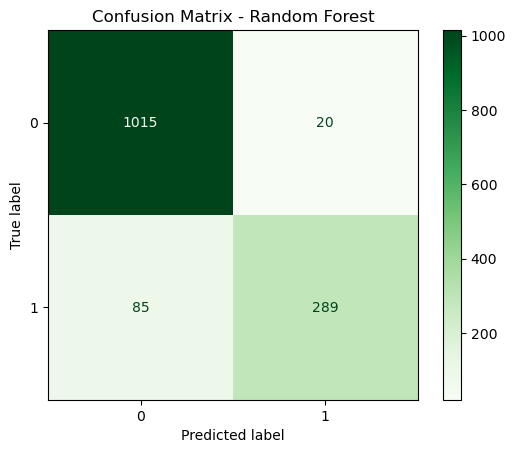

In [108]:
# -------------------------------------------------------------------
# Step 3.6: Confusion Matrix
# -------------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()


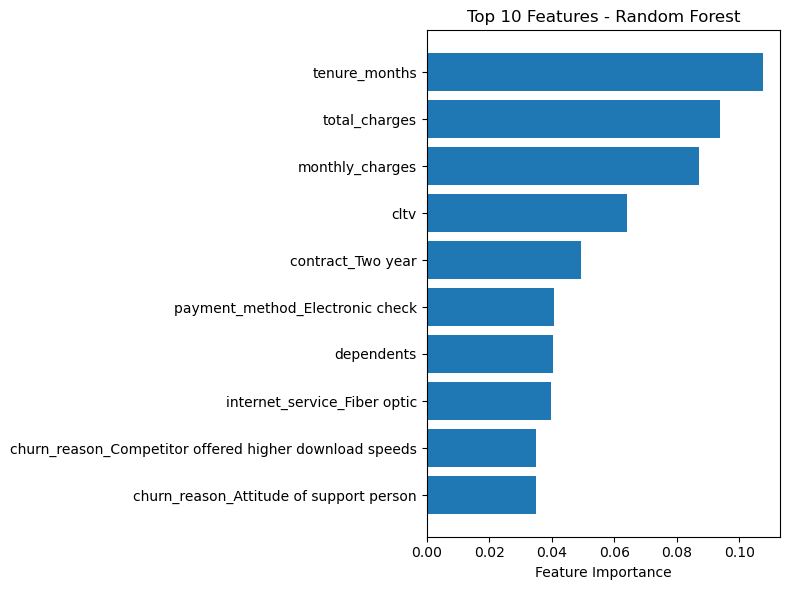

In [109]:
# -------------------------------------------------------------------
# Step 3.7: Feature Importance
# -------------------------------------------------------------------
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Features - Random Forest")
plt.tight_layout()
plt.show()


In [110]:
# -------------------------------------------------------------------
# Step 3.8: Cross-Validation
# -------------------------------------------------------------------
print("\n🔁 Cross-Validation:")
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(rf_model, X, y, cv=5, scoring=scoring, return_train_score=False)

print("\n⭐ Cross-Validation Metrics (Mean ± Std):")
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():10}: {scores.mean():.4f} ± {scores.std():.4f}")


🔁 Cross-Validation:

⭐ Cross-Validation Metrics (Mean ± Std):
Accuracy  : 0.9106 ± 0.0071
Precision : 0.9253 ± 0.0190
Recall    : 0.7212 ± 0.0148
F1        : 0.8106 ± 0.0151
Roc_auc   : 0.9704 ± 0.0032


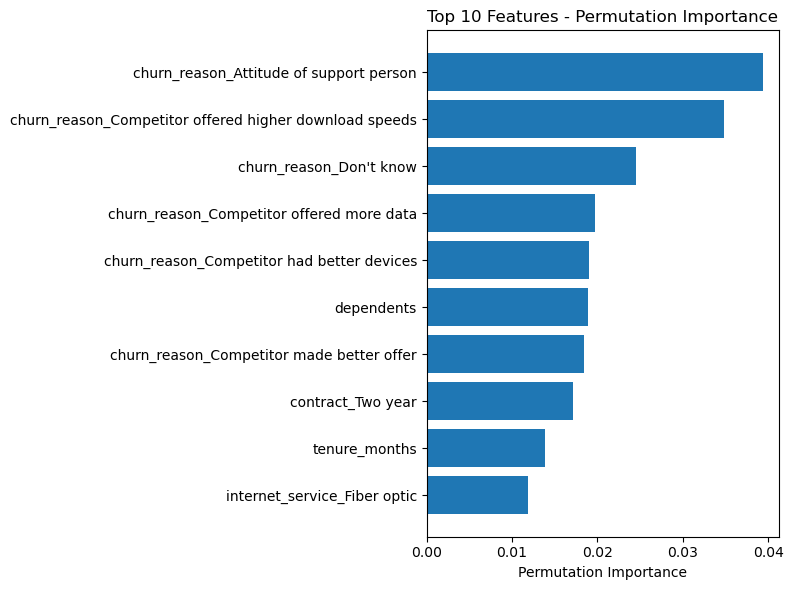

✅ Permutation importances saved for Power BI.


In [111]:
# 🔍 Step 3.10: Feature Importance using Permutation Importance
# This evaluates feature importance by measuring the decrease in model performance when a feature’s values are randomly shuffled.
# The most important features cause the biggest drop in performance.

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Use original test set (not filtered), same as used in model training
result = permutation_importance(
    rf_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Create DataFrame of importance scores
importances = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(8, 6))
plt.barh(importances['Feature'][:10][::-1], importances['Importance'][:10][::-1])
plt.xlabel("Permutation Importance")
plt.title("Top 10 Features - Permutation Importance")
plt.tight_layout()
plt.show()

# Export to CSV for Power BI
importances.to_csv("permutation_feature_importance.csv", index=False)
print("✅ Permutation importances saved for Power BI.")


In [112]:
# -------------------------------------------------------------------
# Step 3.10: Save Model
# -------------------------------------------------------------------
joblib.dump(rf_model, "random_forest_churn_model.pkl")
print("✅ Model saved as random_forest_churn_model.pkl")

✅ Model saved as random_forest_churn_model.pkl


In [113]:
# -------------------------------------------------------------------
# Step 3.11: Export Predictions for Power BI
# -------------------------------------------------------------------
results_df = X_test.copy()
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred
results_df['Churn_Probability'] = y_prob
results_df.to_csv("rf_churn_predictions.csv", index=False)
print("✅ Predictions saved as rf_churn_predictions.csv")

✅ Predictions saved as rf_churn_predictions.csv


In [114]:
# ✅ Add predictions and churn probabilities to the test set
X_test_copy = X_test.copy()
X_test_copy['Actual_Churn'] = y_test.values
X_test_copy['Predicted_Churn'] = y_pred
X_test_copy['Churn_Probability'] = y_prob

# ✅ Save to CSV
X_test_copy.to_csv("rf_churn_predictions.csv", index=False)
print("✅ Predictions file exported for Power BI.")


✅ Predictions file exported for Power BI.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ✅ Create a DataFrame of performance metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),     
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_prob)
    ]
}

# ✅ Save to CSV
pd.DataFrame(metrics).to_csv("model_performance_metrics.csv", index=False)
print("✅ Model metrics exported.")


✅ Model metrics exported.


In [116]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Assuming you already have X_train and rf_model
# Example: rf_model = RandomForestClassifier().fit(X_train, y_train)

# Step 1: Extract feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# Step 2: Normalize (optional but recommended for % interpretation)
feature_importance['Importance'] = feature_importance['Importance'] / feature_importance['Importance'].sum()

# Step 3: Sort descending
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Step 4: Save to CSV
feature_importance.to_csv('rf_feature_importance.csv', index=False)

print("Feature importance file saved as rf_feature_importance.csv")


Feature importance file saved as rf_feature_importance.csv
